In [1]:
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('JRC_dataset_text.xlsx', sheet_name='Haiti earthquake')
df

,full_text
0,#Internacional\n\nLa OPS despliega a expertos ...
1,#16Ago Casi dos mil muertos deja terremoto en ...
2,"Haiti Earthquake: Death toll risen over 1200, ..."
3,Prayers for Haiti 💔💔🙏 https://t.co/zMKkWLHySR
4,"Let’s pray for people in #haitie, they are suf..."
...,...
3232,Di fronte all’aggravarsi della situazione ad H...
3233,"ACN has pledged a €500,000 emergency aid pack ..."
3234,Desde @Entreculturas y Alboan nunca hemos deja...
3235,Haïti : @SolidLaique appelle aux dons après le...


In [3]:
# Import required library
from langdetect import detect

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Detect language for each text
df['language'] = df['full_text'].apply(detect_language)

# Show language distribution
language_counts = df['language'].value_counts()
print("Language distribution in the dataset:")
print(language_counts)

Language distribution in the dataset:
language
en         1274
es         1132
fr          284
pt          147
tr          103
de           58
it           51
sw           26
nl           23
id           20
ca           20
pl           16
unknown      10
sq            9
fi            6
no            6
ar            6
sl            4
vi            4
af            3
da            3
hi            3
ur            3
hr            2
fa            2
et            2
el            2
th            2
uk            2
kn            1
ro            1
sk            1
ru            1
so            1
ta            1
cs            1
he            1
lv            1
ja            1
hu            1
tl            1
ko            1
cy            1
Name: count, dtype: int64


Jumlah bahasa unik yang ada: 43


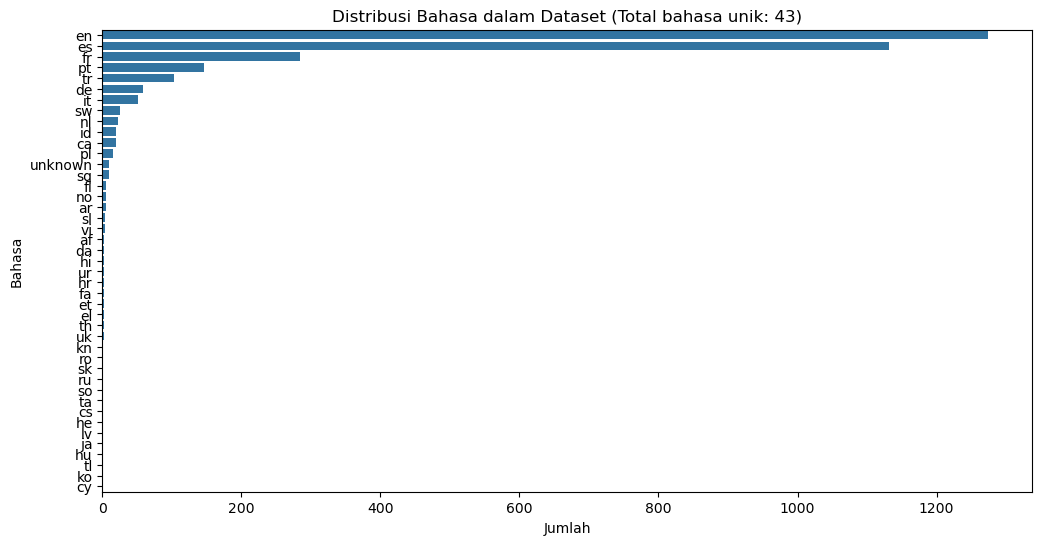

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

# Menghitung jumlah bahasa unik
unique_languages_count = df['language'].nunique()
print(f"Jumlah bahasa unik yang ada: {unique_languages_count}")

# Menampilkan jumlah bahasa unik dalam plot
plt.figure(figsize=(12, 6))
sns.countplot(y='language', data=df, order=language_counts.index)
plt.title(f'Distribusi Bahasa dalam Dataset (Total bahasa unik: {unique_languages_count})')
plt.xlabel('Jumlah')
plt.ylabel('Bahasa')
plt.show()

In [5]:
# Import libraries
from langdetect import detect
from deep_translator import GoogleTranslator
import pandas as pd

# Function to translate text to English
def translate_to_english(text, source_lang):
    try:
        # If the text is already in English, return it as-is
        if source_lang == 'en':
            return text
        # Translate text to English
        translator = GoogleTranslator(source=source_lang, target='en')
        return translator.translate(text)
    except:
        return 'Translation error'

# Detect language for each text
df['language'] = df['full_text'].apply(detect_language)

# Translate all non-English texts to English
df['english_translation'] = df.apply(
    lambda row: translate_to_english(row['full_text'], row['language']),
    axis=1
)

# View result: displaying the first few rows
print(df[['full_text', 'language', 'english_translation']].head())


                                           full_text language  \
0  #Internacional\n\nLa OPS despliega a expertos ...       es   
1  #16Ago Casi dos mil muertos deja terremoto en ...       es   
2  Haiti Earthquake: Death toll risen over 1200, ...       en   
3      Prayers for Haiti 💔💔🙏 https://t.co/zMKkWLHySR       en   
4  Let’s pray for people in #haitie, they are suf...       en   

                                 english_translation  
0  #International\n\nPAHO deploys experts to supp...  
1  #16Aug Nearly two thousand dead after earthqua...  
2  Haiti Earthquake: Death toll risen over 1200, ...  
3      Prayers for Haiti 💔💔🙏 https://t.co/zMKkWLHySR  
4  Let’s pray for people in #haitie, they are suf...  


In [6]:
# Remove rows with 'Translation error' in english_translation column
df = df[df['english_translation'] != 'Translation error']

# Verify results
print(f"Number of rows after removing translation errors: {len(df)}")

Number of rows after removing translation errors: 3226


In [7]:
df

,full_text,language,english_translation
0,#Internacional\n\nLa OPS despliega a expertos ...,es,#International\n\nPAHO deploys experts to supp...
1,#16Ago Casi dos mil muertos deja terremoto en ...,es,#16Aug Nearly two thousand dead after earthqua...
2,"Haiti Earthquake: Death toll risen over 1200, ...",en,"Haiti Earthquake: Death toll risen over 1200, ..."
3,Prayers for Haiti 💔💔🙏 https://t.co/zMKkWLHySR,en,Prayers for Haiti 💔💔🙏 https://t.co/zMKkWLHySR
4,"Let’s pray for people in #haitie, they are suf...",en,"Let’s pray for people in #haitie, they are suf..."
...,...,...,...
3232,Di fronte all’aggravarsi della situazione ad H...,it,"Faced with the worsening situation in Haiti, f..."
3233,"ACN has pledged a €500,000 emergency aid pack ...",en,"ACN has pledged a €500,000 emergency aid pack ..."
3234,Desde @Entreculturas y Alboan nunca hemos deja...,es,From @Entreculturas and Alboan we have never s...
3235,Haïti : @SolidLaique appelle aux dons après le...,fr,Haiti: @SolidLaique calls for donations after ...


In [8]:
languages_found = language_counts.index.tolist()
print("Bahasa yang ditemukan dalam dataset:")
print(languages_found)

Bahasa yang ditemukan dalam dataset:
['en', 'es', 'fr', 'pt', 'tr', 'de', 'it', 'sw', 'nl', 'id', 'ca', 'pl', 'unknown', 'sq', 'fi', 'no', 'ar', 'sl', 'vi', 'af', 'da', 'hi', 'ur', 'hr', 'fa', 'et', 'el', 'th', 'uk', 'kn', 'ro', 'sk', 'ru', 'so', 'ta', 'cs', 'he', 'lv', 'ja', 'hu', 'tl', 'ko', 'cy']


In [9]:
# Drop 'full_text' and 'language' columns
df = df.drop(['full_text', 'language'], axis=1)

# Display the updated dataframe
df.head()

,english_translation
0,#International\n\nPAHO deploys experts to supp...
1,#16Aug Nearly two thousand dead after earthqua...
2,"Haiti Earthquake: Death toll risen over 1200, ..."
3,Prayers for Haiti 💔💔🙏 https://t.co/zMKkWLHySR
4,"Let’s pray for people in #haitie, they are suf..."


In [10]:
# Save the dataframe to an Excel file
df.to_excel('haiti_english_dataset.xlsx', index=False)

print("Dataframe has been saved to 'haiti_english_dataset.xlsx'")

Dataframe has been saved to 'haiti_english_dataset.xlsx'
